<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:

df = pd.read_csv("data.csv",delimiter=',')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
types = df.dtypes
columns_names = df.columns.values
categorical = []
for i in range(len(columns_names)):
    if types[i] == 'object':
        categorical.append(columns_names[i])


print('Dane tekstowe zawierają kolumny :\n\n', categorical)


Dane tekstowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df = df.replace(" ?", 'Not a Country')
print("\nLista wszytkich narodowości:\n\n",df['native_country'].value_counts())

print("\nLista ras:\n\n",df['race'].value_counts())
SetToData = pd.get_dummies(df,columns = ['income'])



Lista wszytkich narodowości:

  United-States                 29170
 Mexico                          643
Not a Country                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru 

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [5]:
columns_names = SetToData.columns.values

X = SetToData[columns_names[0:-2]].to_numpy()
y = SetToData[columns_names[-1]].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [6]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# instantiate the model
gnb = GaussianNB()

C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

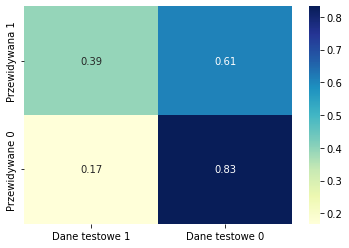

In [8]:
# fit the model
gnb.fit(X_train,y_train)
# gnb
y_pred = gnb.predict(X_test)
cm = metrics.confusion_matrix(y_test,y_pred,normalize='true')

cm_matrix = pd.DataFrame(data=cm, columns=['Dane testowe 1', 'Dane testowe 0'],
                                 index=['Przewidywana 1', 'Przewidywane 0'])

sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')

Text(0, 0.5, 'Frequency')

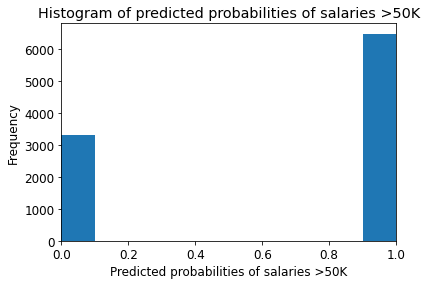

In [9]:
y_prob = gnb.predict_proba(X_test)
plt.rcParams['font.size'] = 12
plt.hist(y_prob[:,1], bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')



In [10]:
correct = []
uncorrect = []
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        uncorrect.append(i)
    else:
        correct.append(i)
print(len(correct)/len(y_pred)*100, '% poprawnych typowań')

49.79015252328795 % poprawnych typowań


Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [11]:

X = df.drop('race', axis=1)
y = SetToData['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
gnb = GaussianNB()
# fit the model
gnb.fit(X_train,y_train)
# gnb
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)

C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        80
 Asian-Pac-Islander       0.04      0.01      0.01       318
              Black       0.33      0.07      0.11       911
              Other       0.00      0.00      0.00        72
              White       0.86      0.98      0.92      8388

           accuracy                           0.85      9769
          macro avg       0.25      0.21      0.21      9769
       weighted avg       0.77      0.85      0.80      9769



C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

<AxesSubplot:>

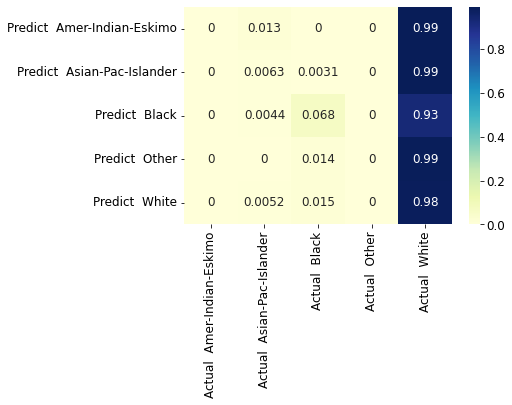

In [12]:
cm = metrics.confusion_matrix(y_test,y_pred,normalize='true')

names = SetToData['race'].unique()
print(metrics.classification_report(y_test,y_pred))
names.sort()
cm_matrix = pd.DataFrame(data=cm, columns=["Actual "+ str(names[i]) for i in range(len(names))],
                                 index=["Predict "+ str(names[i]) for i in range(len(names))])

sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')


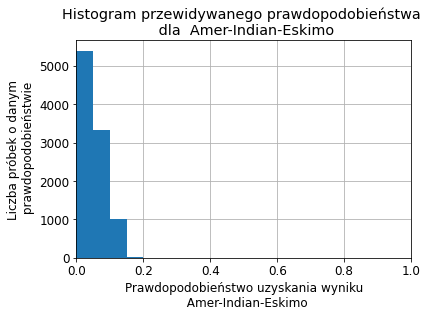

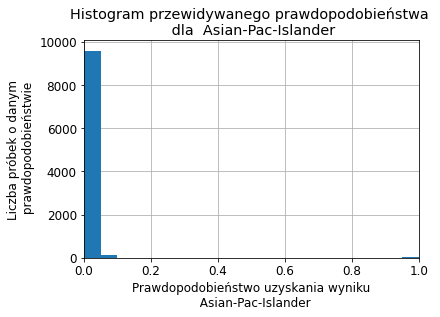

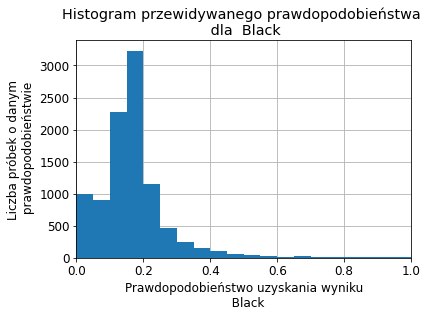

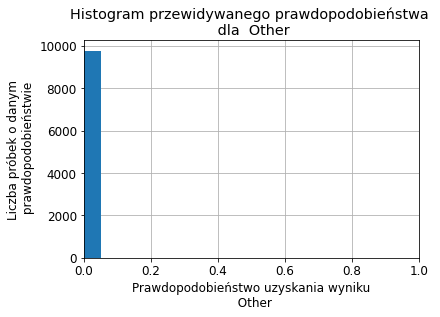

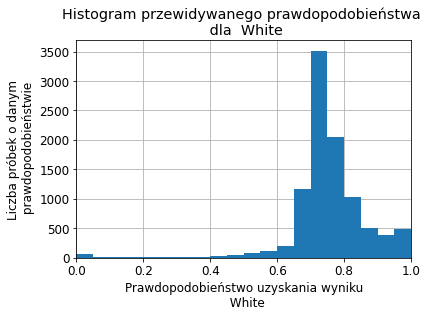

In [13]:
for i in range(len(names)):
    plt.rcParams['font.size'] = 12
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.hist(y_prob[:,i], bins = 20, range=(0,1))
    plt.title('Histogram przewidywanego prawdopodobieństwa \n dla ' + names[i])
    plt.xlim(0,1)
    plt.xlabel('Prawdopodobieństwo uzyskania wyniku\n '+ names[i])
    plt.ylabel('Liczba próbek o danym\n prawdopodobieństwie')
    plt.show()



In [37]:
X = df.drop('native_country', axis=1)
y = SetToData['native_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
gnb = GaussianNB()
# fit the model
gnb.fit(X_train,y_train)
# gnb
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)

C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_

C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sebastian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         4
                     Canada       0.00      0.00      0.00        37
                      China       0.00      0.00      0.00        17
                   Columbia       0.00      0.00      0.00        13
                       Cuba       0.00      0.00      0.00        25
         Dominican-Republic       0.00      0.00      0.00        23
                    Ecuador       0.00      0.00      0.00         4
                El-Salvador       0.00      0.00      0.00        37
                    England       0.00      0.00      0.00        29
                     France       0.00      0.00      0.00         9
                    Germany       0.00      0.00      0.00        49
                     Greece       0.00      0.00      0.00        10
                  Guatemala       0.00      0.00      0.00        16
                      Haiti      

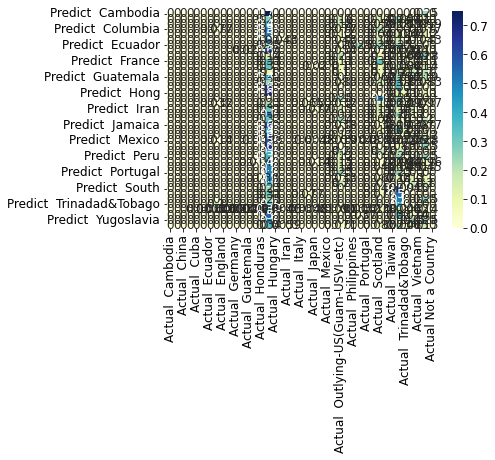

In [43]:
cm = metrics.confusion_matrix(y_test,y_pred,normalize='true')

names = y_test.unique()
print(metrics.classification_report(y_test,y_pred))
names.sort()

cm_matrix = pd.DataFrame(data=cm, columns=["Actual "+ str(names[i]) for i in range(len(names))],
                                 index=["Predict "+ str(names[i]) for i in range(len(names))])

sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')

[' United-States' 'Not a Country' ' India' ' Mexico' ' El-Salvador'
 ' England' ' France' ' Germany' ' Peru' ' Philippines' ' South' ' Cuba'
 ' Canada' ' Honduras' ' Puerto-Rico' ' Hong' ' China' ' Iran' ' Greece'
 ' Japan' ' Cambodia' ' Dominican-Republic' ' Ireland' ' Italy' ' Jamaica'
 ' Guatemala' ' Vietnam' ' Nicaragua' ' Thailand' ' Poland' ' Taiwan'
 ' Hungary' ' Yugoslavia' ' Haiti' ' Portugal' ' Trinadad&Tobago'
 ' Columbia' ' Scotland' ' Outlying-US(Guam-USVI-etc)' ' Laos' ' Ecuador']


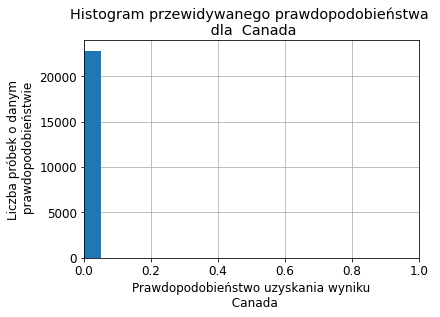

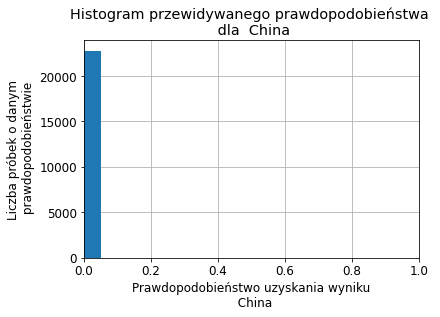

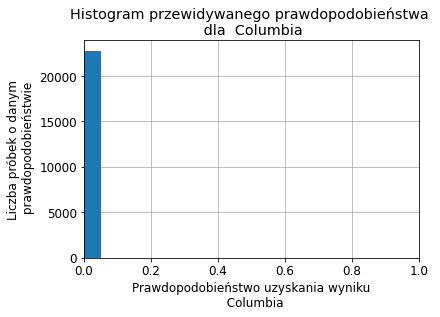

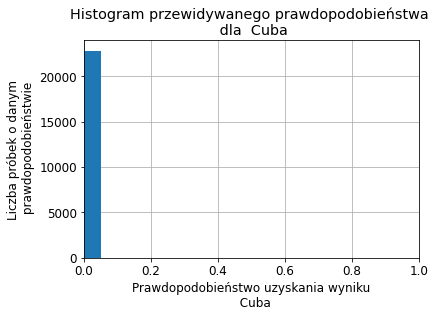

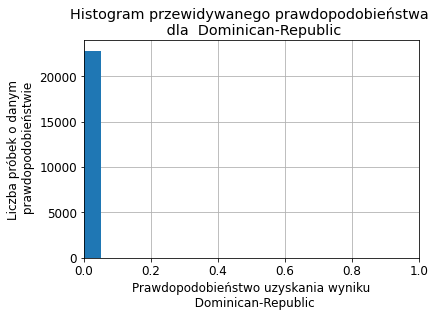

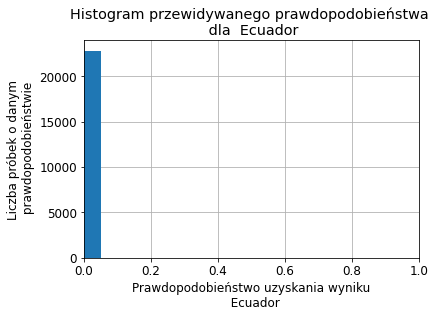

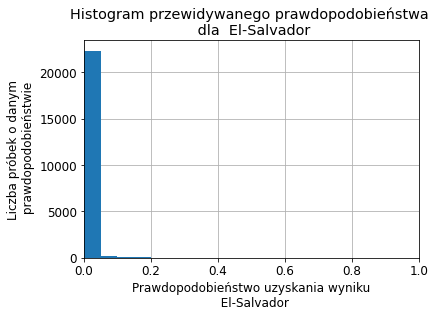

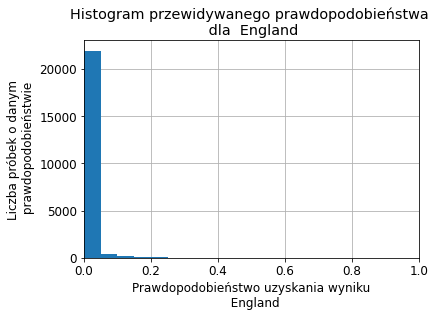

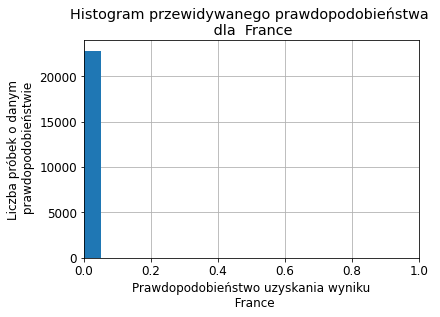

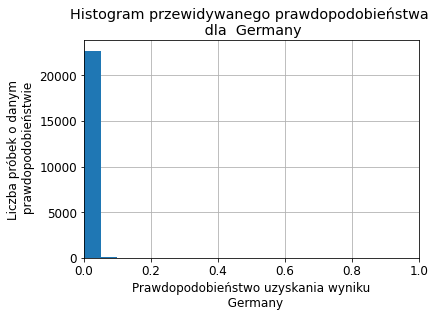

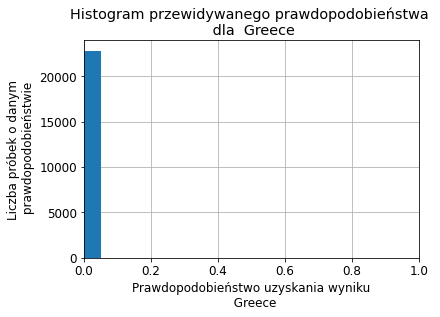

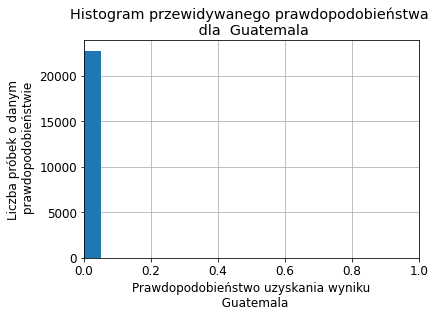

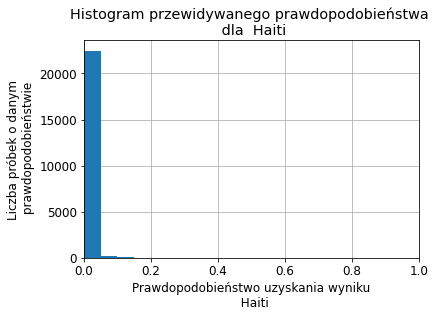

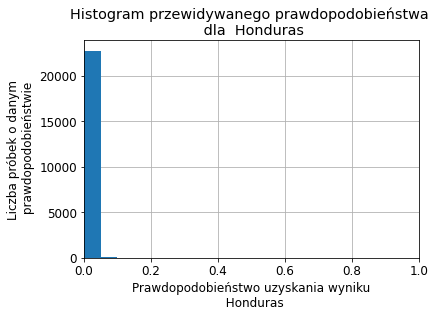

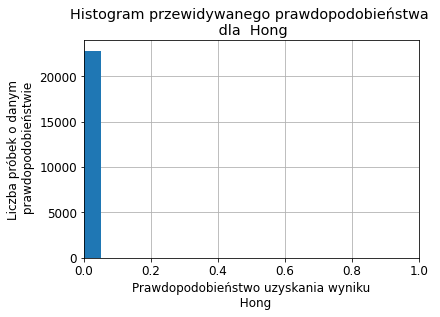

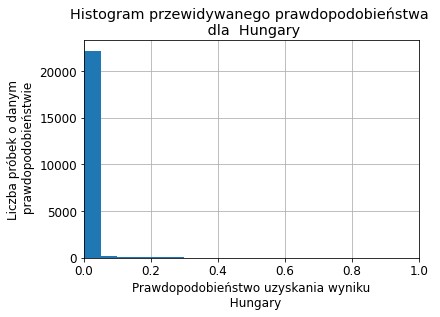

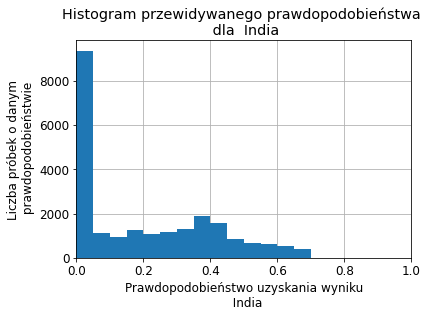

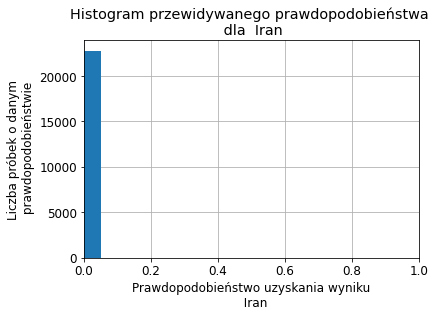

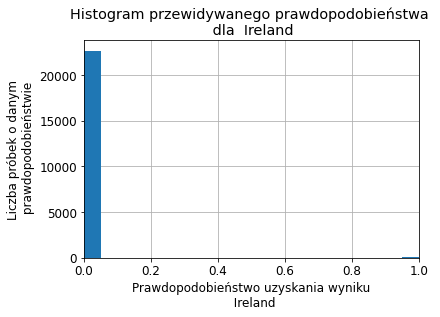

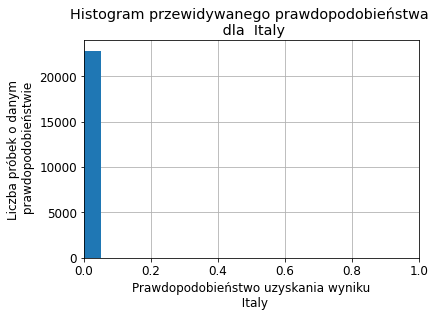

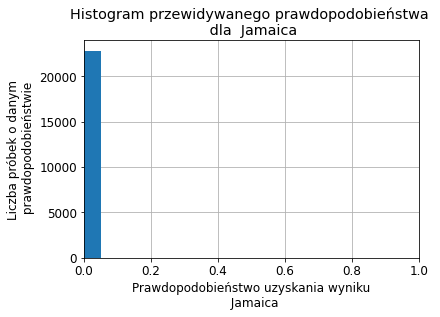

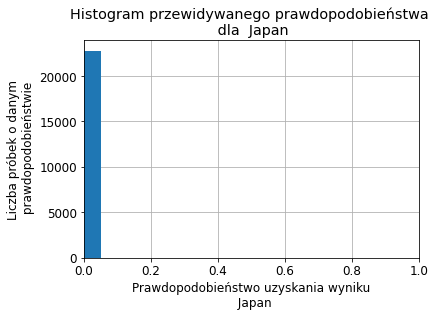

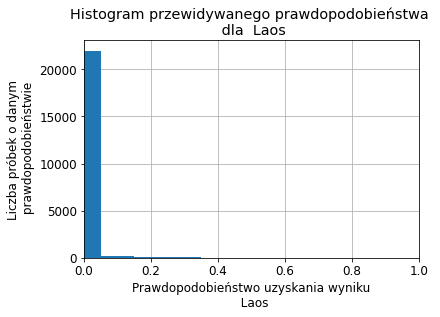

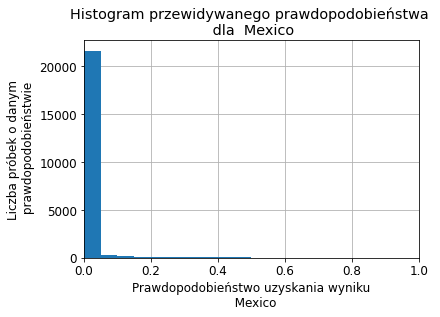

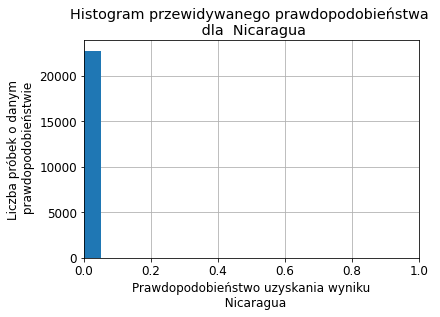

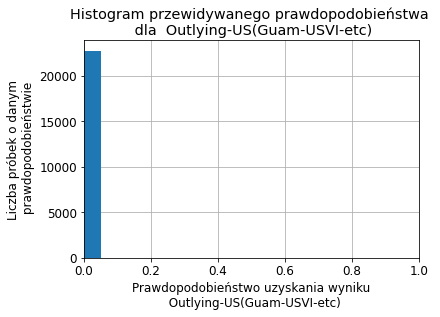

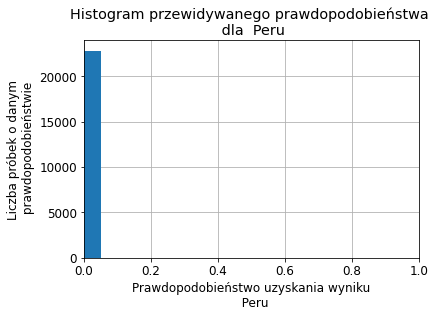

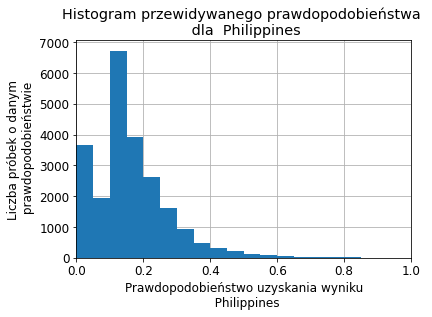

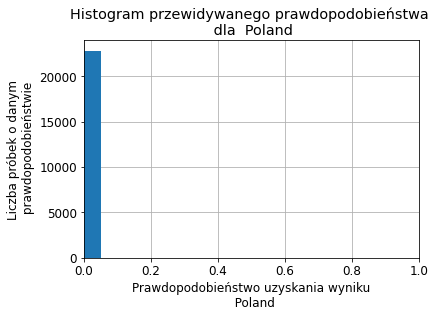

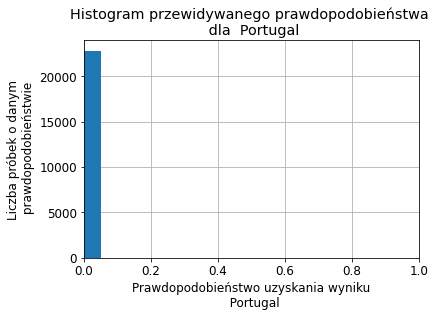

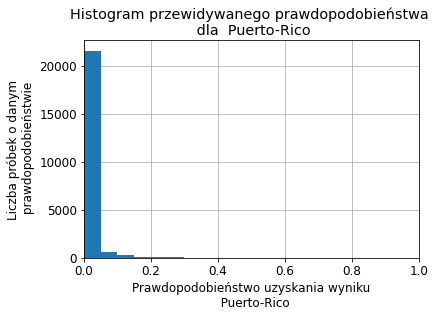

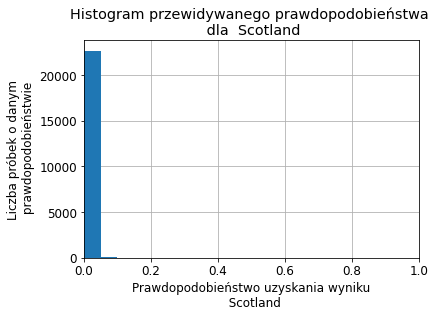

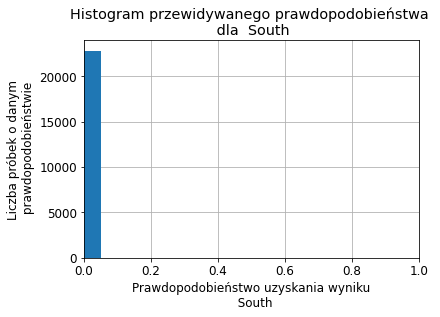

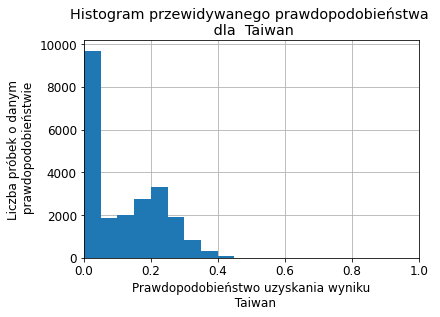

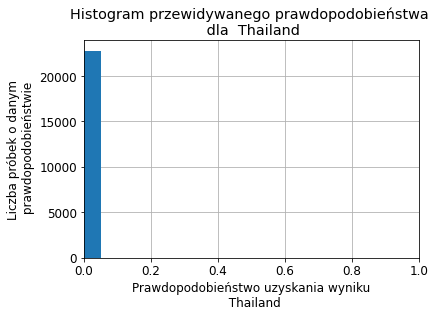

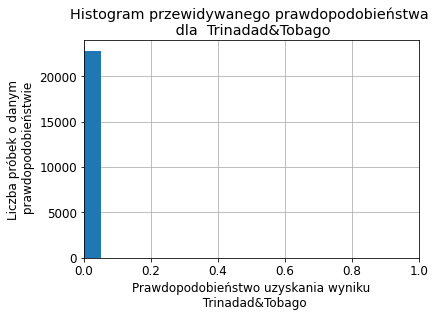

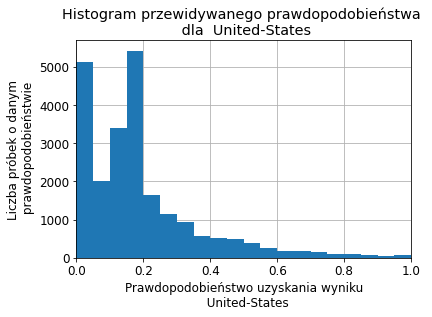

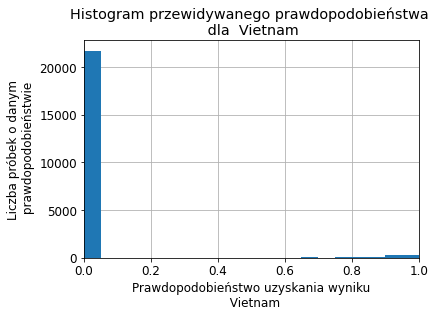

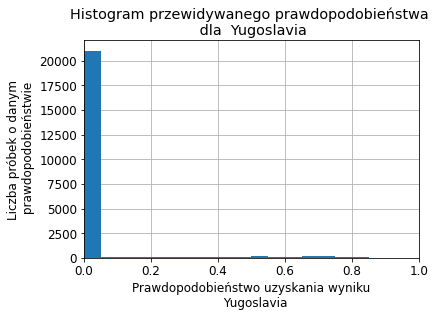

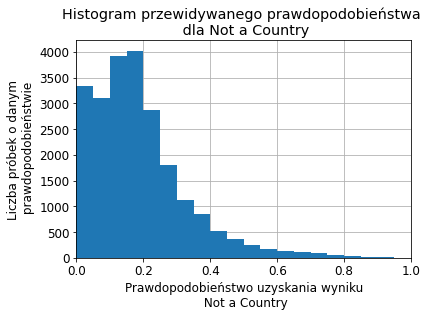

 United-States                 29170
 Mexico                          643
Not a Country                    583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [54]:
names = y_test.unique()
print(names)
names.sort()


for i in range(len(names)-2):
    plt.rcParams['font.size'] = 12
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.hist(y_prob[:,i], bins = 20, range=(0,1))
    plt.title('Histogram przewidywanego prawdopodobieństwa \n dla ' + names[i+1])
    plt.xlim(0,1)
    plt.xlabel('Prawdopodobieństwo uzyskania wyniku\n '+ names[i+1])
    plt.ylabel('Liczba próbek o danym\n prawdopodobieństwie')
    plt.show()

plt.rcParams['font.size'] = 12
plt.rc('axes', axisbelow=True)
plt.grid()
plt.hist(y_prob[:,len(names)-1], bins = 20, range=(0,1))
plt.title('Histogram przewidywanego prawdopodobieństwa \n dla ' + names[len(names)-1])
plt.xlim(0,1)
plt.xlabel('Prawdopodobieństwo uzyskania wyniku\n '+ names[len(names)-1])
plt.ylabel('Liczba próbek o danym\n prawdopodobieństwie')
plt.show()

****
Wnioski:

Porównując metody stosowane na poprzednich laboratoriach z metodą klasyfikatorów, doszedłem do następujących wniosków:
Klasyfikatory pozwalają na badanie wystąpienia wielu zmiennych jednocześnie, dokładność wyznaczania rozwiązań poprawnych
jest zbliżona do poprzednich metod. Rozkład prawdopodobieństwa na histogramach zależy od liczby przebadanych próbek treningowych,
im więcej ich jest tym bardziej większa szansa dokładnego dopasowania, dobrze widać to na przykładzie wykresów narodowości
gdzie histogramy dla państw o dużej liczbie wystąpień w bazie danych mają wysokie słupki biżej wartości centralnych
(United-States, Philipines, NotaCountry)